### О наборе данных

#### Информация о наборе данных
Данный набор данных содержит записи, связанные с ценами акций Microsoft за определенный период. Он включает в себя основные финансовые показатели, такие как цены открытия и закрытия, максимумы и минимумы за день, объем торгов и скорректированные цены закрытия. Набор данных помогает анализировать тенденции цен на акции, волатильность и поведение рынка.

Этот набор данных был синтезирован на основе реальных паттернов фондового рынка, предоставляя возможность для финансового моделирования и прогнозного анализа. Он может быть использован для прогнозирования временных рядов, обнаружения тенденций и корреляционных исследований с внешними рыночными индикаторами.

#### Содержание
Входные переменные:

- Дата: Дата торгов по акциям.
- Open (Открытие): Цена, по которой акции Microsoft открылись в этот день.
- High (Максимум): Наивысшая цена акций, достигнутая в течение торговой сессии.
- Low (Минимум): Наименьшая цена акций, зафиксированная в этот день.
- Close (Закрытие): Цена, по которой акция Microsoft закрылась в конце торговой сессии.
- Adjusted Close (Скорректированная цена закрытия): Цена закрытия, скорректированная с учетом дивидендов и сплитов акций.
- Volume (Объем): Общее количество акций, которые были проданы в течение дня.

#### Благодарности
Этот набор данных является синтезированной версией, основанной на исторических данных фондового рынка. Он предназначен для исследовательских и образовательных целей, помогая пользователям изучать движение цен на акции и рыночные тенденции.

#### Контекст
Движения фондового рынка влияют на множество факторов, включая финансовые показатели компании, экономические индикаторы, настроение инвесторов и глобальные события. Понимание тенденций цен на акции является ключевым для инвесторов, трейдеров и финансовых аналитиков.

Этот набор данных может использоваться для множества аналитических задач, включая прогнозирование временных рядов, анализ волатильности и расчеты технических индикаторов. Пользователи могут исследовать, как акции Microsoft ведут себя с течением времени, и применять методы прогнозного моделирования для предсказания будущих ценовых изменений.

In [37]:
# импорт бибилиотек дл работы с данными
import pandas as pd 
import numpy as np 
# иморт бибилиотек для визуализации 
import matplotlib.pyplot as plt 
import seaborn as sns 
# убираем надоедливые ошибки
import warnings

warnings.filterwarnings('ignore')
# визуализация выбросов
import missingno as mno

In [38]:
# загрузка датафрейма
df = pd.read_csv('Microsoft_Stock.zip')

df.head()

,Date,Open,High,Low,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent
0,2020-01-01,150.56,150.61,150.01,150.14,7878334,151.20,0.0,1.0,0.09
1,2020-01-02,149.83,149.89,149.39,149.64,2780798,150.01,0.0,1.0,-0.33
2,2020-01-03,149.32,150.22,148.76,150.03,11714555,151.22,0.0,1.0,0.26
3,2020-01-04,151.86,152.53,151.67,151.75,24082477,152.38,0.0,1.0,1.15
4,2020-01-05,151.89,153.84,151.13,152.63,43187302,153.35,0.0,1.0,0.58


# EDA (распределения, корреляции, визуализация).


In [39]:
# изменения стиля 
sns.set(style='whitegrid')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                1000 non-null   object 
 1   Open                1000 non-null   float64
 2   High                1000 non-null   float64
 3   Low                 1000 non-null   float64
 4   Close               1000 non-null   float64
 5   Volume              1000 non-null   int64  
 6   AdjustedClose       1000 non-null   float64
 7   Dividend            1000 non-null   float64
 8   SplitCoefficient    1000 non-null   float64
 9   DailyReturnPercent  1000 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 78.3+ KB


In [41]:
df['Date'] =pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.quarter
df['Week'] = df['Date'].dt.isocalendar().week
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1000 non-null   datetime64[ns]
 1   Open                1000 non-null   float64       
 2   High                1000 non-null   float64       
 3   Low                 1000 non-null   float64       
 4   Close               1000 non-null   float64       
 5   Volume              1000 non-null   int64         
 6   AdjustedClose       1000 non-null   float64       
 7   Dividend            1000 non-null   float64       
 8   SplitCoefficient    1000 non-null   float64       
 9   DailyReturnPercent  1000 non-null   float64       
 10  Quarter             1000 non-null   int32         
 11  Week                1000 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(8), int32(1), int64(1)
memory usage: 87.0 KB


In [42]:
# Изменим индекс на дату , т.к. она уникальна
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent,Quarter,Week
Date,,,,,,,,,,,
2020-01-01,150.56,150.61,150.01,150.14,7878334,151.20,0.0,1.0,0.09,1,1
2020-01-02,149.83,149.89,149.39,149.64,2780798,150.01,0.0,1.0,-0.33,1,1
2020-01-03,149.32,150.22,148.76,150.03,11714555,151.22,0.0,1.0,0.26,1,1
2020-01-04,151.86,152.53,151.67,151.75,24082477,152.38,0.0,1.0,1.15,1,1
2020-01-05,151.89,153.84,151.13,152.63,43187302,153.35,0.0,1.0,0.58,1,1


In [43]:
# проверка на пропуски
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
AdjustedClose         0
Dividend              0
SplitCoefficient      0
DailyReturnPercent    0
Quarter               0
Week                  0
dtype: int64


<Axes: >

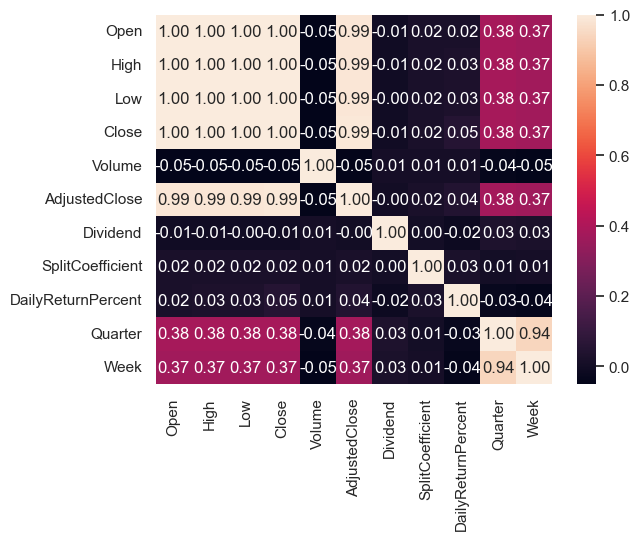

In [44]:
# Матрциа корреляции
sns.heatmap(df.corr(),
            annot= True,
            fmt='.2f')

Создание производных признаков
Замените исходные признаки на более информативные метрики, которые сохранят смысл, но уменьшат избыточность:

Волатильность дня: High - Low
Показывает диапазон колебаний цены.

Ценовое изменение за день: Close - Open
Отражает дневной тренд.

Средняя цена за день: (High + Low) / 2
Альтернатива Open или Close.

Процентное изменение цены: (Close - Open) / Open * 100
Полезно для анализа динамики.

In [45]:
# Добавляем новые признаки , удаляем скоррелированые
data = df.copy()
data['Volatility'] = data['High'] - data['Low']
data['Price_Change'] = data['Close'] - data['Open']
data['Average_Price'] = (data['High'] + data['Low']) / 2
data.drop(['High','Low','Open'], axis = 1,inplace=True)
data.head()

,Close,Volume,AdjustedClose,Dividend,SplitCoefficient,DailyReturnPercent,Quarter,Week,Volatility,Price_Change,Average_Price
Date,,,,,,,,,,,
2020-01-01,150.14,7878334,151.20,0.0,1.0,0.09,1,1,0.60,-0.42,150.310
2020-01-02,149.64,2780798,150.01,0.0,1.0,-0.33,1,1,0.50,-0.19,149.640
2020-01-03,150.03,11714555,151.22,0.0,1.0,0.26,1,1,1.46,0.71,149.490
2020-01-04,151.75,24082477,152.38,0.0,1.0,1.15,1,1,0.86,-0.11,152.100
2020-01-05,152.63,43187302,153.35,0.0,1.0,0.58,1,1,2.71,0.74,152.485


Использование скорректированных цен
Если Adjusted Close почти идентичен Close, оставьте только один из них, но добавьте признак, отражающий их разницу (если она есть):

In [46]:
data['Adjustment_Diff'] = data['AdjustedClose'] - data['Close'] 
data.drop(['AdjustedClose','Close'], axis =1, inplace=True)
data.head()

,Volume,Dividend,SplitCoefficient,DailyReturnPercent,Quarter,Week,Volatility,Price_Change,Average_Price,Adjustment_Diff
Date,,,,,,,,,,
2020-01-01,7878334,0.0,1.0,0.09,1,1,0.60,-0.42,150.310,1.06
2020-01-02,2780798,0.0,1.0,-0.33,1,1,0.50,-0.19,149.640,0.37
2020-01-03,11714555,0.0,1.0,0.26,1,1,1.46,0.71,149.490,1.19
2020-01-04,24082477,0.0,1.0,1.15,1,1,0.86,-0.11,152.100,0.63
2020-01-05,43187302,0.0,1.0,0.58,1,1,2.71,0.74,152.485,0.72


<Axes: >

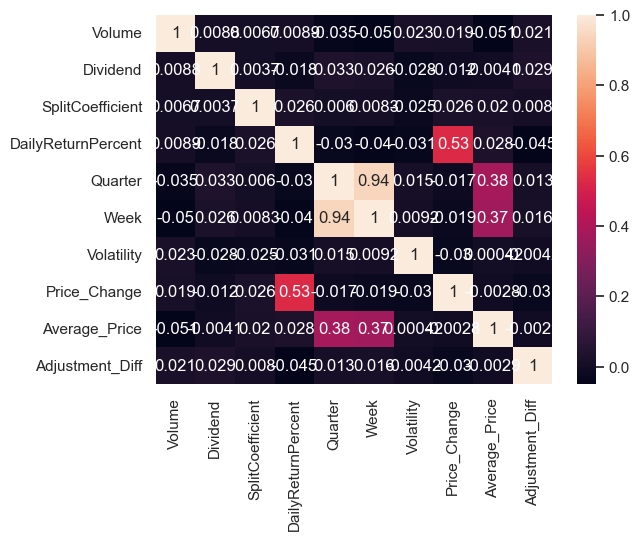

In [47]:
# визуализаия матрици корреляции
sns.heatmap(data.corr(),
            annot=True,
            fmt='.2g')

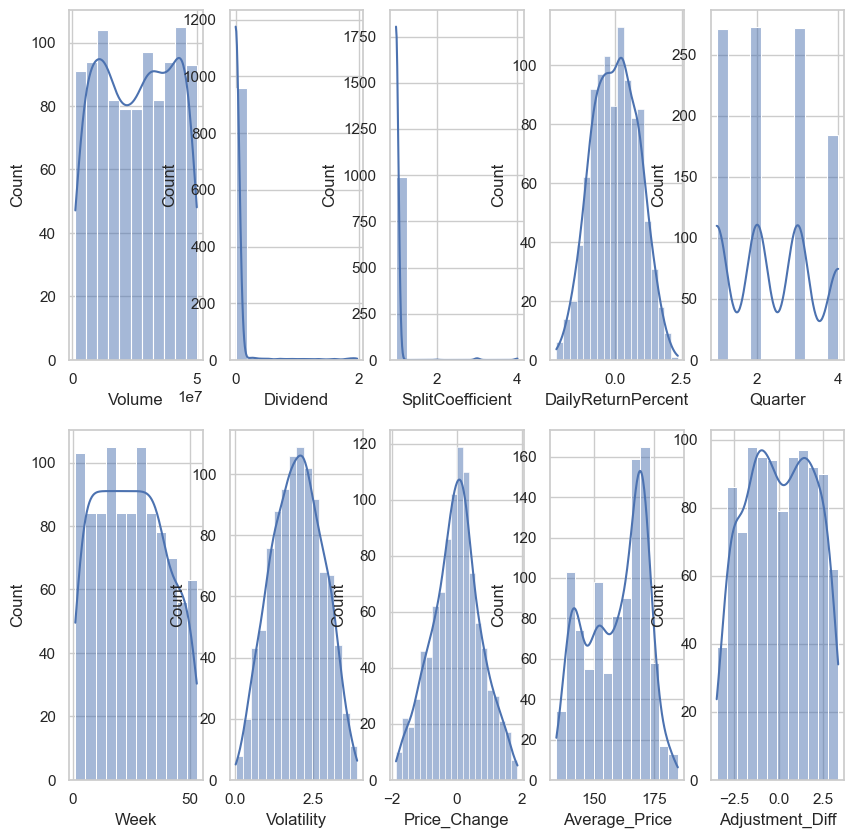

In [48]:
#график распределение данных
plt.figure(figsize=(10,10))
for ind, col in enumerate(data.columns):
    
    plt.subplot(2, 5,ind+1)
    sns.histplot(x= data[col],kde=True)

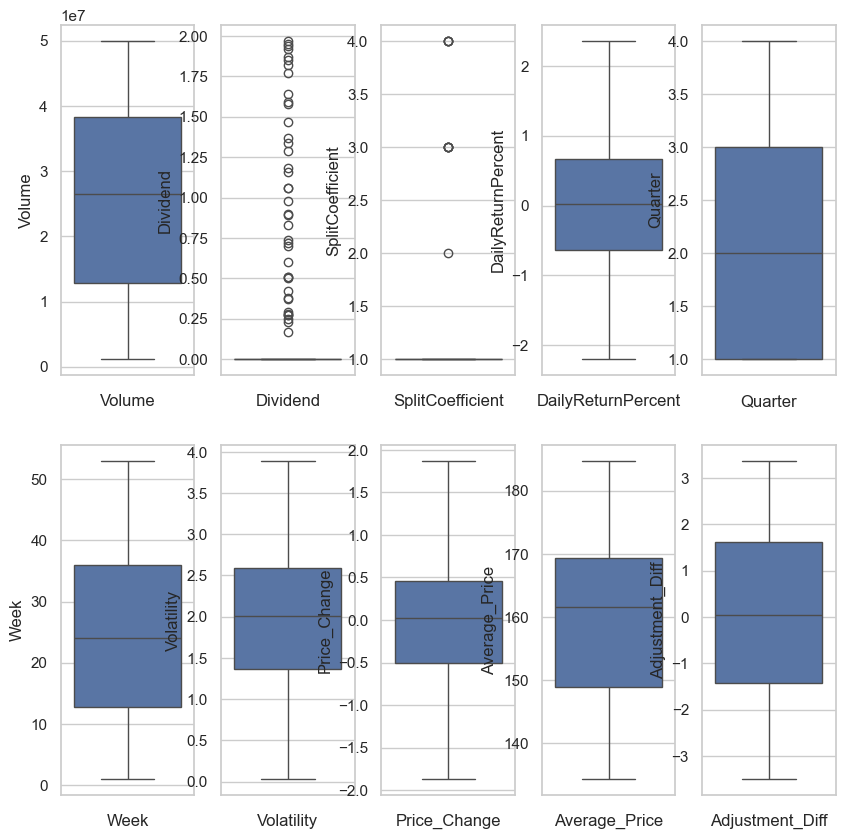

In [49]:
# Визуализируем выбросы 
plt.figure(figsize=(10,10))
for ind,col in enumerate(data.columns):
    plt.subplot(2,5,ind+1)
    sns.boxplot(data[col] )
    plt.xlabel(col)

# Обучение модели

In [50]:
# Создадим сломварик чтобы потом сравнить результаты
model_score = {}

## Разделение данных на тестовые и обучающие

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, KFold

In [52]:
#разделение данных

X = data.drop('DailyReturnPercent', axis = 1)
y = data['DailyReturnPercent']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.15)

## Линейная Регрессия


In [53]:
linear_model = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42) 

linear_model.fit(X_train,y_train)

LinearRegression()

In [54]:
# Предсказанные значения
y_pred_linear = linear_model.predict(X_test)

In [55]:
# Остатки (разница между реальными и предсказанными значениями)
residuals = y_test - y_pred_linear


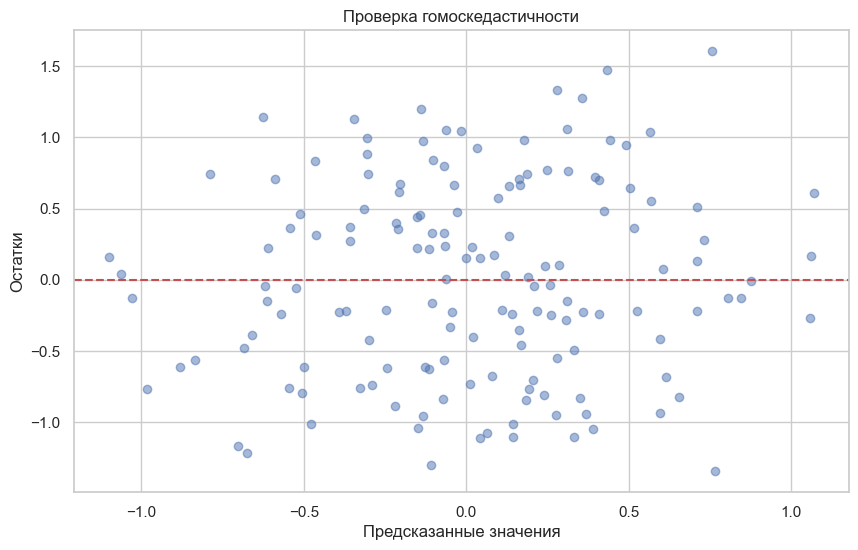

In [56]:


# График остатков vs предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Проверка гомоскедастичности')
plt.show()

In [57]:
# кросссвалидация 
from sklearn.metrics import mean_squared_error
scores = cross_val_score(
    estimator=linear_model,
    X=X_train,
    y=y_train,
    cv=kfold,
    scoring='r2'  # Метрика оценки: R²
)


model_score['Lineal Regression '] = {
    'r2': r2_score(y_true=y_test, y_pred=linear_model.predict(X_test)),
    'cv_score': scores,
    'mse': mean_squared_error(y_test, y_pred=linear_model.predict(X_test))  
}


print("R² scores:", scores)
print("Средний R²:", np.mean(scores))
print(f'MSE : {mean_squared_error(y_test,y_pred=linear_model.predict(X_test))}')


R² scores: [0.24669249 0.23561699 0.18168942 0.30583759 0.29360857]
Средний R²: 0.2526890127102079
MSE : 0.47139771970306243


In [58]:
# добавим скалирвоание к нашим данным
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Создаем плайплайн со скалирвоанием
pipe_model_line = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('Regression', LinearRegression()),
        
    ]
)


pipe_model_line.fit(X_test,y_test)


score_linear_pipe = cross_val_score(estimator=pipe_model_line,
                        X=X_train,
                        y = y_train,
                        cv= 5)

model_score['Lineal Regression Pipeline'] = {
    'r2': r2_score(y_true=y_test, y_pred=pipe_model_line.predict(X_test)),
    'cv_score': score_linear_pipe,
    'mse': mean_squared_error(y_test, y_pred=pipe_model_line.predict(X_test))  
}

print("Кросс-валидация балл:", score_linear_pipe)
print("Средний балл кросс-валидации:", score_linear_pipe.mean())
print(f'R2 : {r2_score(y_pred=pipe_model_line.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=pipe_model_line.predict(X_test))}')

Кросс-валидация балл: [0.17455016 0.2076428  0.2071082  0.35294849 0.25384117]
Средний балл кросс-валидации: 0.23921816495438347
R2 : 0.38609189079454076
MSE : 0.4434470985129671


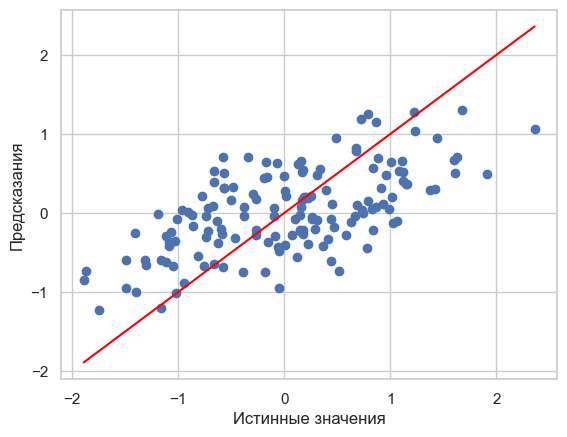

In [59]:
# График предсказаний 
import matplotlib.pyplot as plt

plt.scatter(y_test, pipe_model_line.predict(X_test))
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

## попробуем другую модель , например  RandomForestRegressor

In [60]:

from sklearn.ensemble import RandomForestRegressor

RFR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ("RFR", RandomForestRegressor(random_state=42))
    ]
)


RFR_pipe.fit(X_train, y_train)



score_RFR_pipe = cross_val_score(estimator=RFR_pipe,
                        X=X_train,
                        y = y_train,
                        cv= 5)


model_score['Random Forest Regressor'] = {
    'r2': r2_score(y_true=y_test, y_pred=RFR_pipe.predict(X_test)),
    'cv_score': score_RFR_pipe,
    'mse': mean_squared_error(y_test, y_pred=RFR_pipe.predict(X_test))  
}


print("Кросс-валидация балл:", score_RFR_pipe)
print("Средний балл кросс-валидации:", score_RFR_pipe.mean())
print(f'R2 : {r2_score(y_pred=RFR_pipe.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=RFR_pipe.predict(X_test))}')

Кросс-валидация балл: [0.11191937 0.14658612 0.1119741  0.26112231 0.1921614 ]
Средний балл кросс-валидации: 0.1647526581144289
R2 : 0.31154265395092706
MSE : 0.49729659533333337


In [ ]:
# подбор параметров
from sklearn.model_selection import GridSearchCV
params_RFR = {
    'RFR__max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'RFR__max_leaf_nodes': [1, 2, 3],
    'RFR__n_estimators': [100, 200, 300, 400, 500],
    'RFR__min_samples_leaf': [1, 2, 3, 4, 5],
}

search_RFR = GridSearchCV(
    estimator=RFR_pipe,
    param_grid=params_RFR,
    scoring='r2',
    cv=5
)

search_RFR.fit(X_train,y_train)


print("Best params :", search_RFR.best_params_)
print('Best Score :' ,{search_RFR.best_score_})
print(f'MSE : {mean_squared_error(y_test,y_pred=search_RFR.best_estimator_.predict(X_test))}')


model_score['Random Forest Regressor Grid Search'] = {
    'r2': r2_score(y_true=y_test, y_pred=search_RFR.best_estimator_.predict(X_test)),
    'cv_score': search_RFR.best_score_,
    'mse': mean_squared_error(y_test, y_pred=search_RFR.best_estimator_.predict(X_test))  
}


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_RFR.best_estimator_.predict(X_test), alpha=0.5, label=f'Random Forest Regression (R² = {r2_score(y_test,search_RFR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

<Figure size 1000x600 with 0 Axes>

## а теперь решающие деревья

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('DecisionTree', DecisionTreeRegressor())
    ]
)
DTR_pipe.fit(X_train,y_train)


score_DTR_pipe = cross_val_score(estimator=RFR_pipe,
                        X=X_train,
                        y = y_train,
                        cv= 5)



print("Кросс-валидация балл:", score_DTR_pipe)
print("Средний балл кросс-валидации:", score_DTR_pipe.mean())
print(f'R2 : {r2_score(y_pred=DTR_pipe.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=DTR_pipe.best_estimator_.predict(X_test))}')


model_score['Decision Tree Regressor'] = {
    'r2': r2_score(y_true=y_test, y_pred=DTR_pipe.predict(X_test)),
    'cv_score': score_DTR_pipe,
    'mse': mean_squared_error(y_test, y_pred=DTR_pipe.predict(X_test))  
}

In [ ]:
params = {
    'DecisionTree__max_depth': [1, 2, 3, 5, 6, 7, 8, 9, 10],
    'DecisionTree__max_leaf_nodes': [1, 2, 3],
    'DecisionTree__min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  
}
search_DTR = GridSearchCV(
    estimator=DTR_pipe,
    param_grid=params,
    scoring='r2',
    cv=5
)
search_DTR.fit(X_train,y_train)

print("Лучшие параметры :", search_DTR.best_params_)
print(' Лучший результат :' ,{search_DTR.best_score_})
print(f'MSE : {mean_squared_error(y_test,y_pred=search_DTR.best_estimator_.predict(X_test))}')


model_score['Random Forest Regressor Grid Search'] = {
    'r2': r2_score(y_true=y_test, y_pred=search_DTR.best_estimator_.predict(X_test)),
    'cv_score': search_DTR.best_score_,
    'mse': mean_squared_error(y_test, y_pred=search_DTR.best_estimator_.predict(X_test))  
}



In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_DTR.best_estimator_.predict(X_test), alpha=0.5, label=f'Decisiob Tree Regression (R² = {r2_score(y_test,search_DTR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Градиентный бустинг

In [ ]:
# Пример улучшения R² для Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA



GBR_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('GBR', GradientBoostingRegressor(n_estimators=300, max_depth=5, learning_rate=0.1))
    ]
)
GBR_pipe.fit(X_train,y_train)


score_GBR = cross_val_score(estimator=search_RFR,
                        X=X,
                        y = y,
                        cv= 5)


print("Кросс-валидация балл:", score_DTR_pipe)
print("Средний балл кросс-валидации:", score_DTR_pipe.mean())
print(f'R2 : {r2_score(y_pred=GBR_pipe.predict(X_test), y_true=y_test)}')
print(f'MSE : {mean_squared_error(y_test,y_pred=GBR_pipe.best_estimator_.predict(X_test))}')


model_score['Decision Tree Regressor'] = {
    'r2': r2_score(y_true=y_test, y_pred=GBR_pipe.predict(X_test)),
    'cv_score': score_GBR,
    'mse': mean_squared_error(y_test, y_pred=GBR_pipe.predict(X_test))  
}

In [ ]:
params =  {
    'GBR__n_estimators': [500, 700, 1000],  # Увеличить количество деревьев
    'GBR__learning_rate': [0.005, 0.01, 0.02],  # Эксперименты с низким lr
    'GBR__max_depth': [3, 4, 5],  # Проверить большую глубину
    'GBR__subsample': [0.7, 0.8, 0.9],
    'GBR__max_features': [None, 0.8, 'sqrt'],
    'GBR__min_samples_split': [2, 5, 10],  # Увеличить для борьбы с переобучением
    'GBR__min_samples_leaf': [1, 2, 4],
    'GBR__ccp_alpha': [0.0, 0.001, 0.01]  # Добавить обрезку
}


search_GBR = GridSearchCV(
    estimator= GBR_pipe,
    param_grid=params,
    scoring ='r2',
    cv = 5,
    n_jobs=-1,
    verbose=2
)
search_GBR.fit(X_train, y_train)




print("Лучшие параметры :", search_GBR.best_params_)
print(' Лучший результат :' ,{search_GBR.best_score_})
print(f'MSE : {mean_squared_error(y_test,y_pred=search_GBR.best_estimator_.predict(X_test))}')


model_score['Random Forest Regressor Grid Search'] = {
    'r2': r2_score(y_true=y_test, y_pred=search_GBR.best_estimator_.predict(X_test)),
    'cv_score': search_GBR.best_score_,
    'mse': mean_squared_error(y_test, y_pred=search_GBR.best_estimator_.predict(X_test))  
}


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, search_GBR.best_estimator_.predict(X_test), alpha=0.5, label=f'Random Forest Regression (R² = {r2_score(y_test,search_GBR.best_estimator_.predict(X_test)):.2f})')
plt.title('Фактические vs Предсказанные значения')
plt.xlabel("Истинные значения")
plt.ylabel("Предсказания")

# Линия идеальных предсказаний
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         color='red', 
         linestyle='--', 
         linewidth=2,
         label='Идеальные предсказания')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
model_score